In [2]:

import pandas as pd
import numpy as np
import math as m
import collections
import os
import json
import csv
import seaborn as sns
import random as rn
from random import randint
from scipy.stats import beta
from matplotlib import pyplot as plt

# Seed folder path

dataset_name = "ground_truth_1"
dataset_folder_path = f"../models/{dataset_name}/readersourcing/"
ratings_filename = f"{dataset_folder_path}ratings.csv"
quantities_filename = f"{dataset_folder_path}quantities.json"
stats_filename = f"{dataset_folder_path}stats.csv"

ratings_dataframe = pd.read_csv(ratings_filename, header=None)
ratings_dataframe[ratings_dataframe.columns] = ratings_dataframe[ratings_dataframe.columns].convert_objects(convert_numeric=True)

stats_dataframe = ratings_dataframe.copy()
stats_dataframe[stats_dataframe > 0.0000001] = 1

with open(quantities_filename) as f:
   quantities = json.load(f)

papers = quantities[0]["Identifiers"]   
readers = quantities[2]["Identifiers"]   
authors = quantities[4]["Identifiers"]   
   
paper_steadiness = quantities[0]["Values"]
paper_score = quantities[1]["Values"]
reader_steadiness = quantities[2]["Values"]
reader_score = quantities[3]["Values"]
author_steadiness = quantities[4]["Values"]
author_score = quantities[5]["Values"]

print("---------- PRINTING PARSED RATING MATRIX (Part of it) ----------")
display(ratings_dataframe.head(10))

print("---------- PRINTING PARSED IDENTIFIERS ----------")
print("PAPER:  ", papers)
print("READER: ", readers)
print("AUTHOR: ", authors)

print("---------- PRINTING PARSED QUANTITIES ----------")
print("PAPER STEADINESS:  ", paper_steadiness)
print("PAPER SCORE:       ", paper_score)
print("READER STEADINESS: ", reader_steadiness)
print("READER SCORE:      ", reader_score)
print("AUTHOR STEADINESS: ", author_steadiness)
print("AUTHOR SCORE:      ", author_score)

---------- PRINTING PARSED RATING MATRIX (Part of it) ----------
---------- PRINTING PARSED IDENTIFIERS ----------
PAPER:   [0, 1]
READER:  [0, 1, 2, 3, 4, 5]
AUTHOR:  [0]
---------- PRINTING PARSED QUANTITIES ----------
PAPER STEADINESS:   [1.000003, 0.5527874045000422]
PAPER SCORE:        [0.7999988000036001, 0.5]
READER STEADINESS:  [1.000003, 1.000003, 1.5527904045000422, 1.5527904045000422, 0.0, 0.0]
READER SCORE:       [0.9989045565281977, 0.22540410535324928, 0.5011572610252991, 0.9992945301858136, 1e-06, 1e-06]
AUTHOR STEADINESS:  [1.5527904045000422]
AUTHOR SCORE:       [0.6932003824409205]


C:\Ambienti\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,0,1
0,0.8,0.0
1,0.2,0.0
2,0.2,0.5
3,0.8,0.5


---------- STATS GENERATION STARTED ----------
MAX NUMBER OF RATINGS FOR A PAPER:  4
MIN NUMBER OF RATINGS FOR A PAPER:  2
MEAN NUMBER OF RATINGS FOR A PAPER:  3
NUMBER OF PAPERS WITH UNIQUE RATING:  0
Counter({1.0: 2, 2.0: 2})
MAX NUMBER OF RATINGS FOR A READER:  2
MIN NUMBER OF RATINGS FOR A READER:  1
MEAN NUMBER OF RATINGS FOR A READER:  1
NUMBER OF READERS WITH UNIQUE RATING:  0
---------- STATS GENERATION COMPLETED ----------


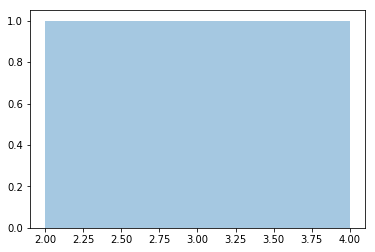

In [3]:

# stats file generation

print("---------- STATS GENERATION STARTED ----------")

sums_paper = stats_dataframe.copy().sum(axis=0)
sums_paper_dataframe = pd.DataFrame(sums_paper)

max_ratings_paper = sums_paper_dataframe.max()
min_ratings_paper = sums_paper_dataframe.min()
mean_ratings_paper = sums_paper_dataframe.mean(axis=0)

sns.distplot(sums_paper_dataframe, kde=False)
plt.show()

print("MAX NUMBER OF RATINGS FOR A PAPER: ", int(max_ratings_paper.values[0]))
print("MIN NUMBER OF RATINGS FOR A PAPER: ", int(min_ratings_paper.values[0]))
print("MEAN NUMBER OF RATINGS FOR A PAPER: ", int(mean_ratings_paper.values[0]))

ratings_dataframe = ratings_dataframe.T
counter = 0
for index, row in ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        counter+=1
        
print("NUMBER OF PAPERS WITH UNIQUE RATING: ", counter)

sums_reader = stats_dataframe.copy().sum(axis=1)
counter=collections.Counter(sums_reader)
print(counter)
sums_reader_dataframe = pd.DataFrame(sums_reader)

max_ratings_reader = sums_reader_dataframe.max()
min_ratings_reader = sums_reader_dataframe.min()
mean_ratings_reader = sums_reader_dataframe.mean(axis=1)

print("MAX NUMBER OF RATINGS FOR A READER: ", int(max_ratings_reader.values[0]))
print("MIN NUMBER OF RATINGS FOR A READER: ", int(min_ratings_reader.values[0]))
print("MEAN NUMBER OF RATINGS FOR A READER: ", int(mean_ratings_reader.values[0]))

ratings_dataframe = ratings_dataframe
counter = 0
for index, row in ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        counter+=1
        
print("NUMBER OF READERS WITH UNIQUE RATING: ", counter)

# Stats file generation

stats_dataframe = pd.DataFrame(columns=[
    "Dataset",
    "Max Number Rating Paper", 
    "Min Number Rating Paper", 
    "Mean Number Rating Paper",
    "Max Number Rating Reader", 
    "Min Number Rating Reader", 
    "Mean Number Rating Reader"
])
stats_dataframe = stats_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Max Number Rating Paper": int(max_ratings_paper.values[0]), 
        "Min Number Rating Paper": int(min_ratings_paper.values[0]), 
        "Mean Number Rating Paper": int(mean_ratings_paper.values[0]), 
        "Max Number Rating Reader": int(max_ratings_reader.values[0]), 
        "Min Number Rating Reader": int(min_ratings_reader.values[0]), 
        "Mean Number Rating Reader": int(mean_ratings_reader.values[0]), 
    }, ignore_index=True)
stats_dataframe.to_csv(stats_filename, index=False)

print("---------- STATS GENERATION COMPLETED ----------")